In [2]:
%matplotlib inline
from importlib import reload
import sys
sys.path.append('..') # If the Example has not been moved this should work

from LyaPlotter.computations import Computations
from LyaPlotter.plotter import Plotter
from LyaPlotter.sims import CoLoReSim, LyaCoLoReSim, QuickQuasarsSim
import glob
import logging
import matplotlib.pyplot as plt
import numpy as np

Define locations of the CoLoRe sims.

In [5]:
location_CoL = '/global/cscratch1/sd/cramirez/reproduce_london/CoLoRe'
location_2LPT = '/project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/'

## CoLoRe Plotter

We use the searcher to search simulations in the ``location_Col`` path. For each simulations a simulation object is created.

In [6]:
CoLoRe_sims = []
for i, path in enumerate(CoLoReSim.search(location_2LPT)):
    CoLoRe_sims.append( CoLoReSim(i,path))
    print(CoLoRe_sims[i])

CoLoRe sim. Id: 0	Name: CoLoRe_4096_2LPT	Path: /project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/CoLoRe_4096_2LPT
CoLoRe sim. Id: 1	Name: CoLoRe_4096_Gaussian	Path: /project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/CoLoRe_4096_Gaussian


The analysis is restricted to the given ifiles (output files from CoLoRe). A full analysis is very memory demanding.

In [7]:
x1 = CoLoRe_sims[0]
x2 = CoLoRe_sims[1]


c_file_1 = x1.get_Sources(ifiles=[0], lr_max=1200.)
c_file_2 = x2.get_Sources(ifiles=[0], lr_max=1200.)

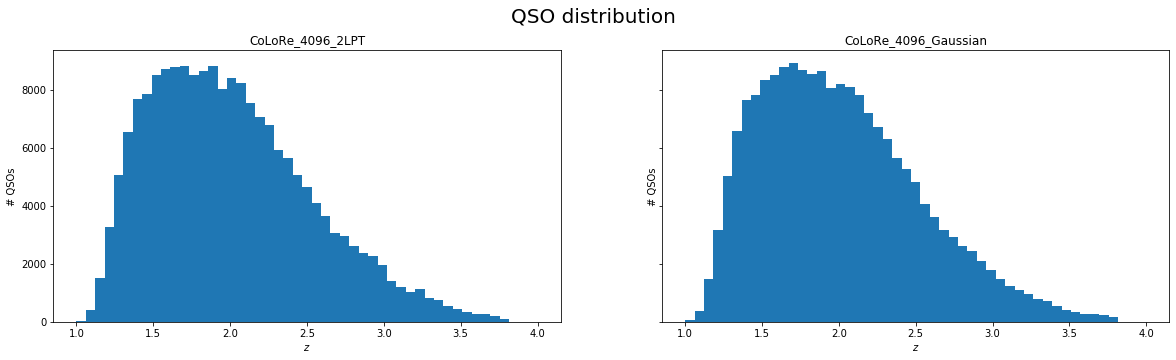

In [8]:
fig1, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.plot_dist(ax=ax1)
_2 = c_file_2.plot_dist(ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('QSO distribution', fontsize=20, y=1)
plt.show()

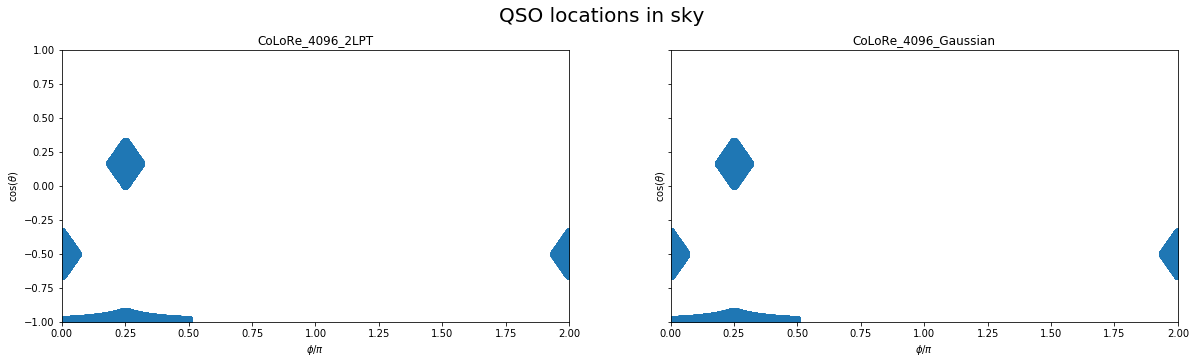

In [9]:
fig2, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.plot_locations(ax=ax1)
_2 = c_file_2.plot_locations(ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('QSO locations in sky', fontsize=20, y=1)
plt.show()

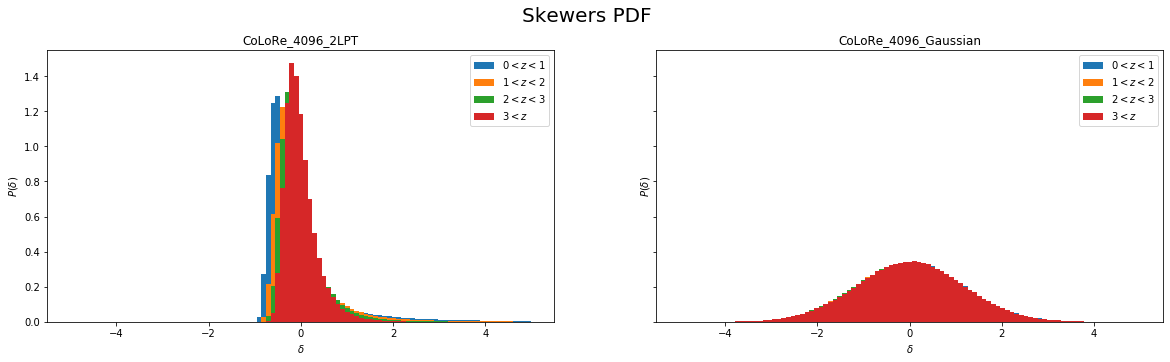

In [10]:
fig3, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.plot_pdf(c_file_1.delta_skewers, ax=ax1)
_2 = c_file_2.plot_pdf(c_file_2.delta_skewers, ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('Skewers PDF', fontsize=20, y=1)
plt.show()

### Plotting deltas

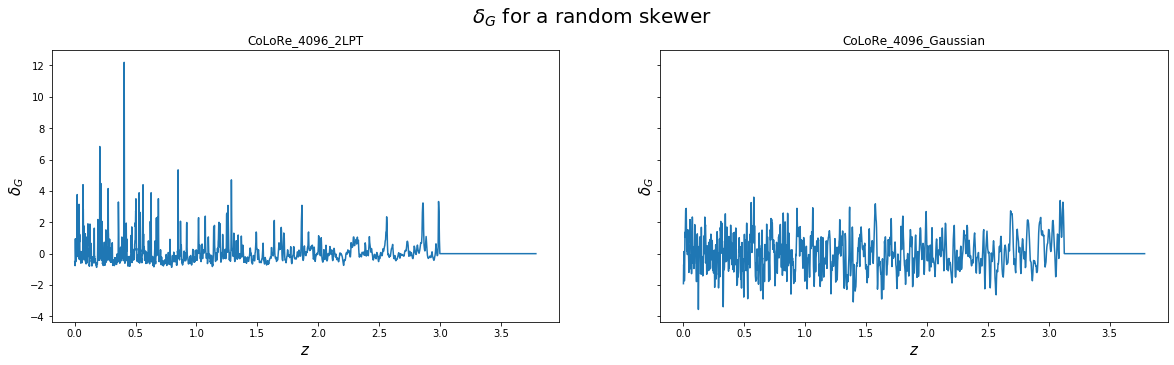

In [17]:
fig4, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.single_skewer(c_file_1.delta_skewers, ax=ax1, mockid=0)
_2 = c_file_2.single_skewer(c_file_2.delta_skewers, ax=ax2, mockid=0)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
[ax.set_xlabel('$z$', fontsize=15) for ax in ax_array]
[ax.set_ylabel('$\delta_G$', fontsize=15) for ax in ax_array]
plt.suptitle('$\delta_G$ for a random skewer', fontsize=20, y=1)
plt.show()

Mean over all pixels = 0.006811579689383507
Mean over all pixels = 0.013026460073888302


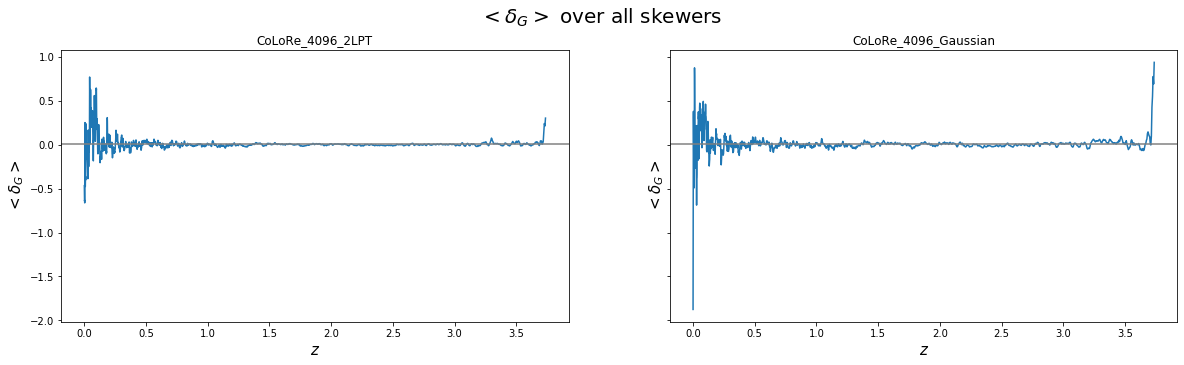

In [12]:
fig5, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.mean_all_skewers(c_file_1.delta_skewers, ax=ax1)
_2 = c_file_2.mean_all_skewers(c_file_2.delta_skewers, ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)

for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$< \delta_G >$', fontsize=15)
plt.suptitle('$< \delta_G >$ over all skewers', fontsize=20, y=1)
plt.show()

Std over all pixels = 1.0396
Std over all pixels = 1.1613


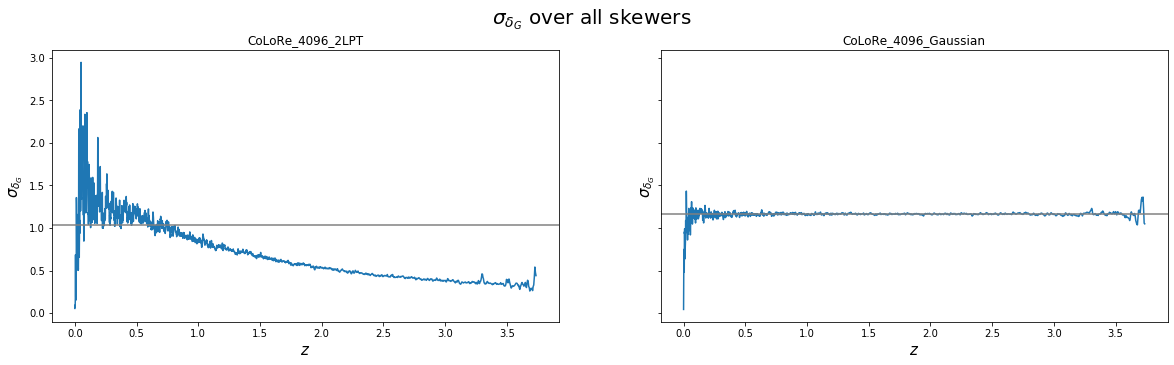

In [13]:
fig6, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.std_all_skewers(c_file_1.delta_skewers, ax=ax1)
_2 = c_file_2.std_all_skewers(c_file_2.delta_skewers, ax=ax2)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$\sigma_{\delta_G}$', fontsize=15)
plt.suptitle('$\sigma_{\delta_G}$ over all skewers', fontsize=20, y=1)
plt.show()

### Plotting radial velocity

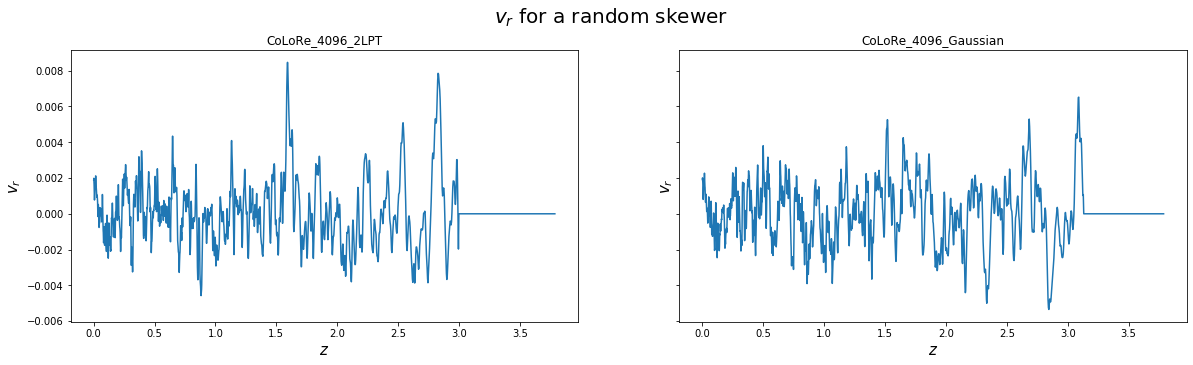

In [14]:
fig7, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.single_skewer(c_file_1.vrad, ax=ax1, mockid=0)
_2 = c_file_2.single_skewer(c_file_2.vrad, ax=ax2, mockid=0)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$ v_r$', fontsize=15)
plt.suptitle('$v_r$ for a random skewer', fontsize=20, y=1)
plt.show()

Mean over all pixels = 4.8778198106447235e-05
Mean over all pixels = 4.587470175465569e-05


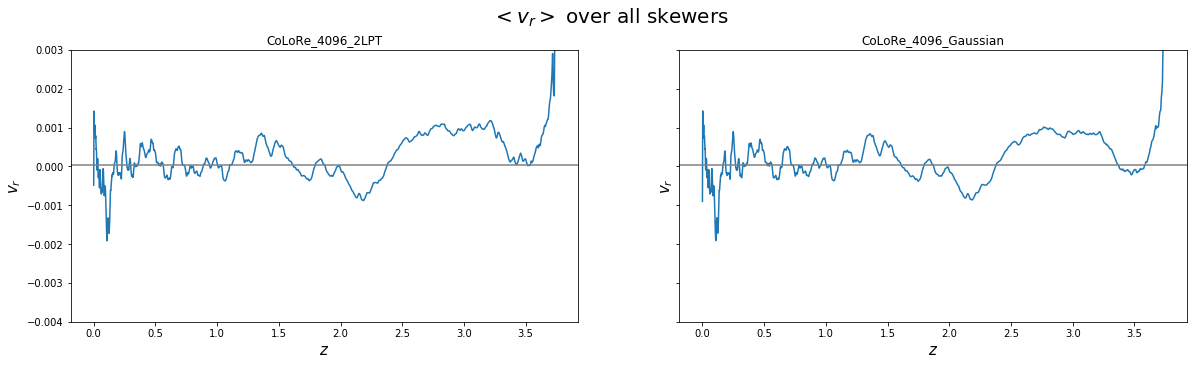

In [15]:
fig8, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.mean_all_skewers(c_file_1.vrad, ax=ax1)
_2 = c_file_2.mean_all_skewers(c_file_2.vrad, ax=ax2)
ax1.set_ylim(-0.004,0.003)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$ v_r$', fontsize=15)
plt.suptitle('$< v_r >$ over all skewers', fontsize=20, y=1)
plt.show()

Std over all pixels = 0.0064
Std over all pixels = 0.0072


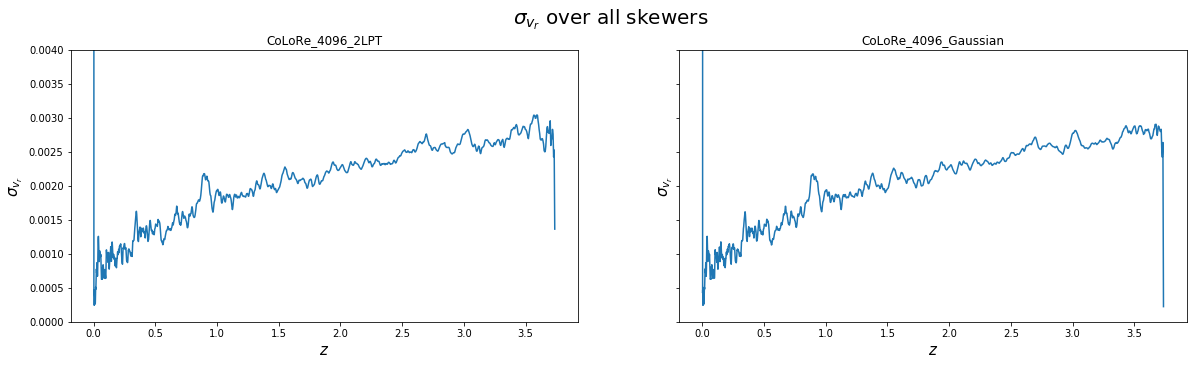

In [16]:
fig9, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.std_all_skewers(c_file_1.vrad, ax=ax1)
_2 = c_file_2.std_all_skewers(c_file_2.vrad, ax=ax2)
ax1.set_ylim(0,0.004)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$\sigma_{v_r}$', fontsize=15)
plt.suptitle('$\sigma_{v_r}$ over all skewers', fontsize=20, y=1)
plt.show()